In [11]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display,SVG
from scipy.stats import entropy
import MESS
import numpy as np
import pandas as pd
import collections

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Removed invariant targets. Retained: ['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'trait_h1', 'trait_h2', 'trait_h3', 'trait_h4', 'mean_local_traits', 'std_local_traits', 'skewness_local_traits', 'kurtosis_local_traits', 'median_local_traits', 'iqr_local_traits', 'abundance_trait_cor']
Nsims
  neutral	345
  filtering	354
  competition	301


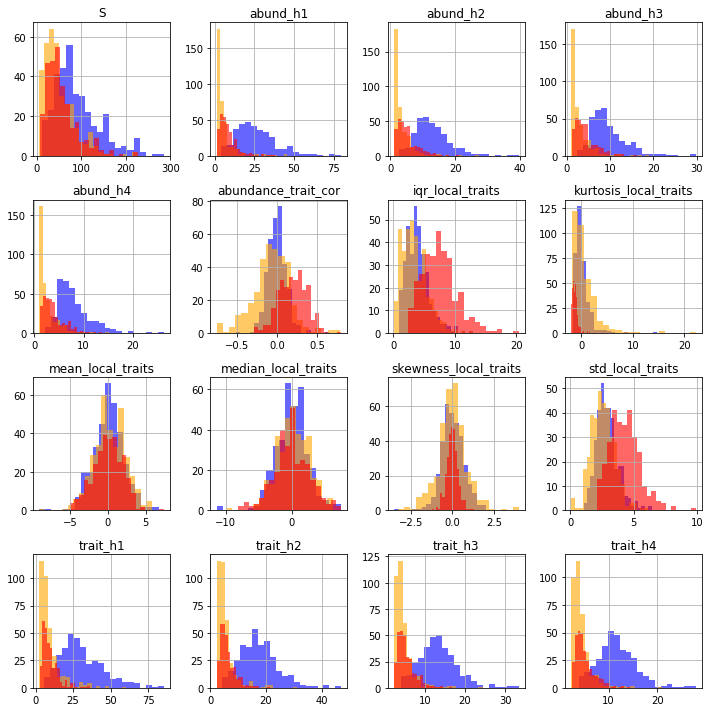

In [23]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=False,\
                                        figsize=(20, 20), select=0.85, tol=.1,\
                                        feature_set=MESS.stats.feature_sets()["abundance+trait"])


## Zoom in on a couple of the plots that are more interesting

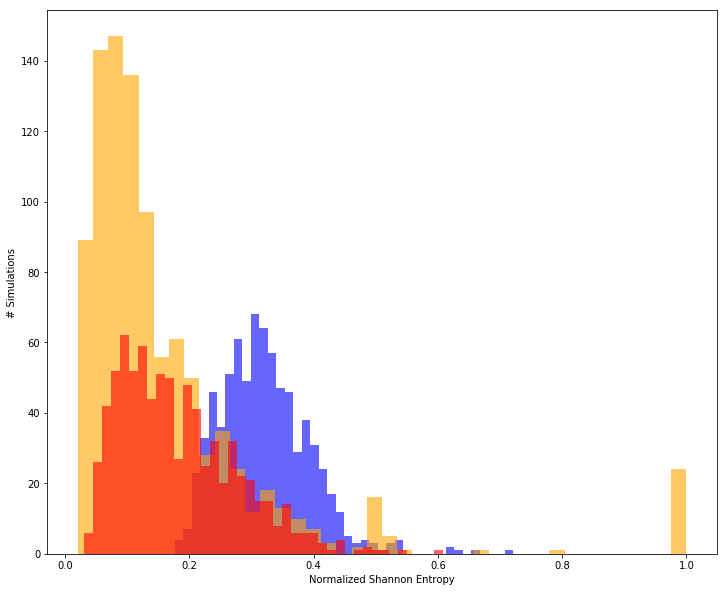

In [14]:
nbins = 40
def normalized_H1(model):
    return dfs[model]["abund_h1"]/dfs[model]["S"]

def plot_model_stat(stat, title):
    fig, ax = plt.subplots(figsize=(12, 10))
    for model, color in zip(["neutral", "filtering", "competition"],
                            ["blue", "orange", "red"]):
        ax.hist(stat(model), label=model, alpha=0.6, color=color, bins=nbins)

    ax.set_xlabel(title)
    ax.set_ylabel("# Simulations")
    plt.rcParams.update({'font.size': 25})

plot_model_stat(normalized_H1, "Normalized Shannon Entropy")

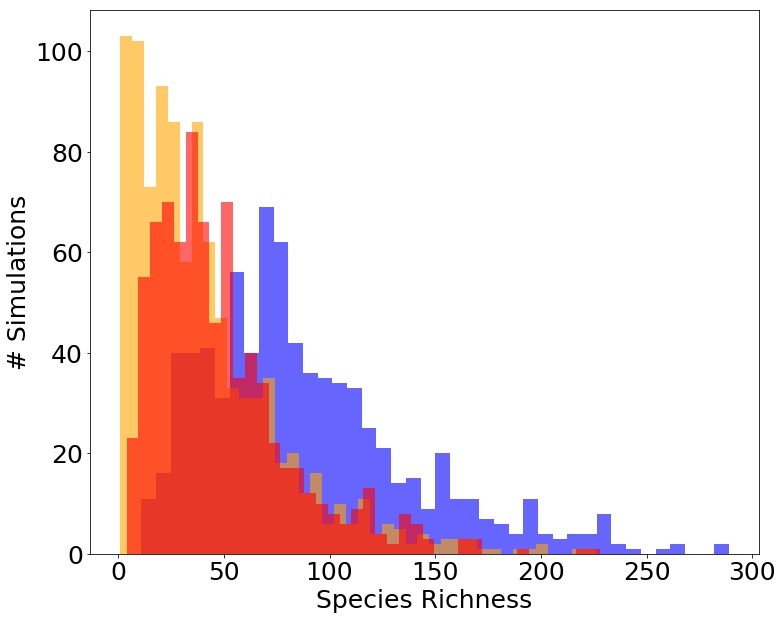

In [15]:
def richness(model):
    return dfs[model]["S"]

plot_model_stat(richness, "Species Richness")

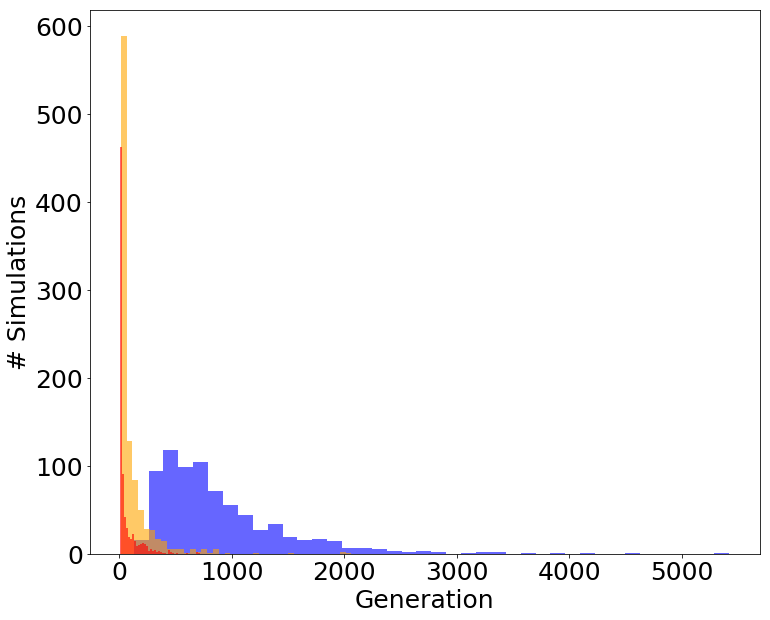

In [16]:
def generation(model):
    return dfs[model]["generation"]

plot_model_stat(generation, "Generation")

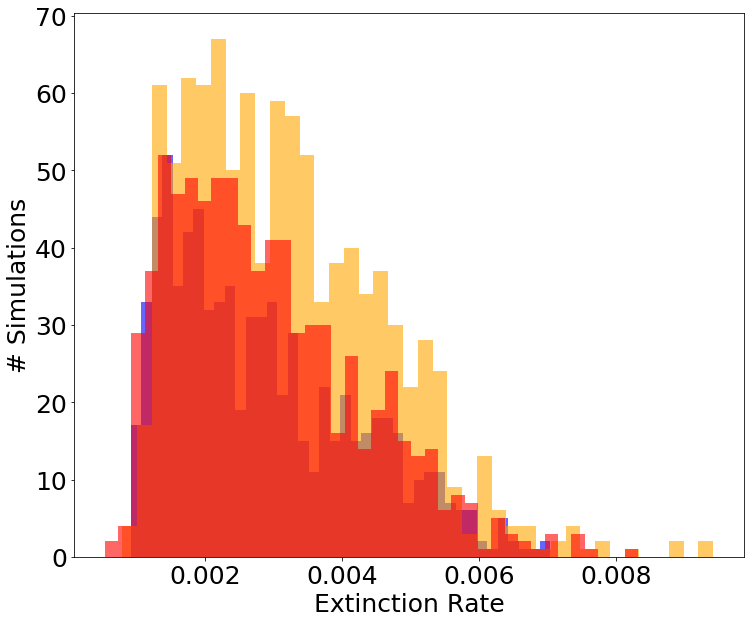

In [17]:
def extinction_rate(model):
    return dfs[model]["extrate_calculated"]

plot_model_stat(extinction_rate, "Extinction Rate")

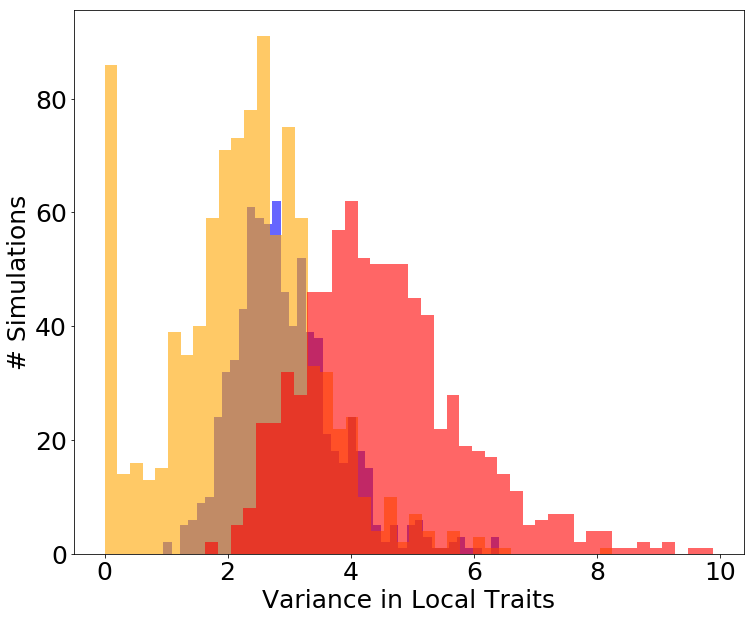

In [18]:
def std_local_traits(model):
    return dfs[model]["std_local_traits"]

plot_model_stat(std_local_traits, "Variance in Local Traits")

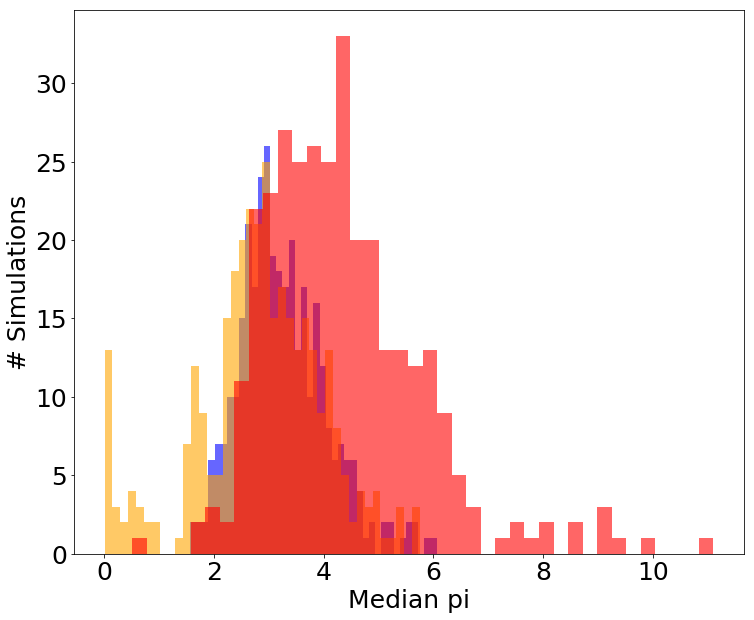

In [130]:
def median_pi(model):
    return dfs[model]["median_pi"]

plot_model_stat(std_local_traits, "Median pi")

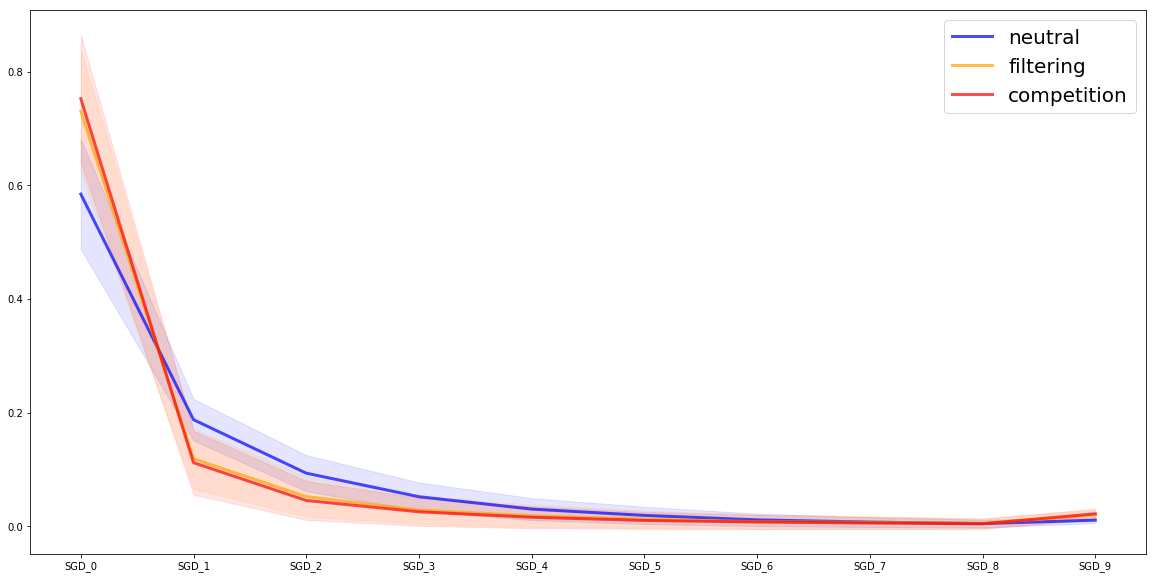

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.legend(fontsize=20)
cols = {"neutral":"blue", "filtering":"orange", "competition":"red"}
for lab, df in dfs.items():
    X = df.filter(regex="SGD*")
    X = X.div(X.sum(axis=1), axis=0)
    ax.plot(X.mean(), linewidth=3, label=lab, alpha=0.7, color=cols[lab])
    ax.fill_between(range(0, 10), X.mean()+X.std(), X.mean()-X.std(), color=cols[lab], alpha=0.1)
ax.legend(fontsize=20)

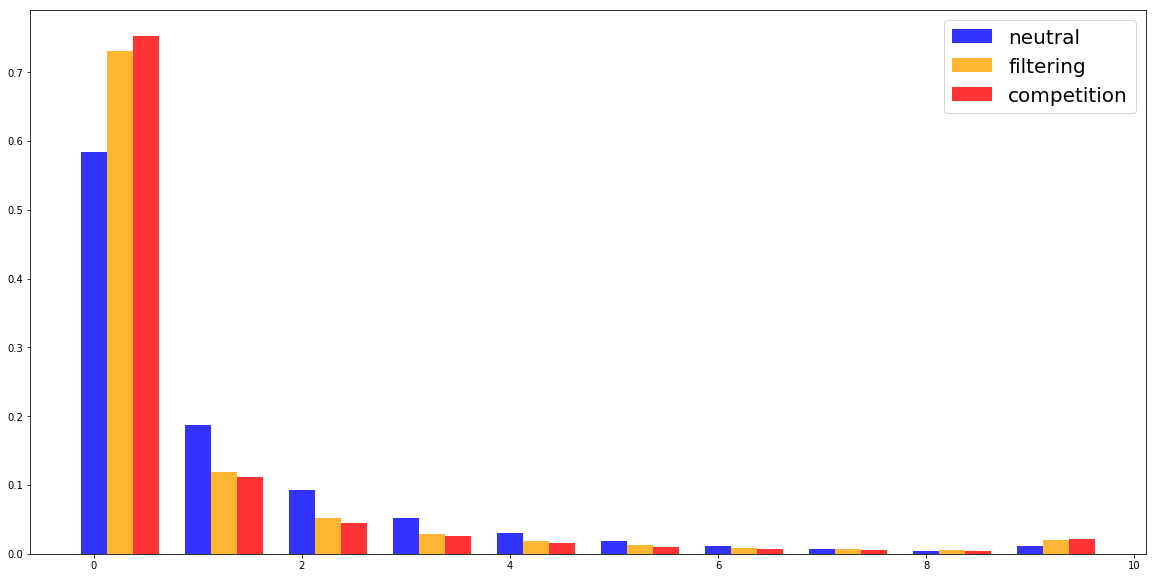

In [105]:
fig, ax = plt.subplots(figsize=(20, 10))

width=1/4.
xs = np.array(xrange(0, 10))
X = neut_df.filter(regex="SGD*")
ax.bar(xs, X.div(X.sum(axis=1), axis=0).mean(), width=width, label="neutral", color="blue", alpha=0.8)
X = filt_df.filter(regex="SGD*")
ax.bar(xs+width, filt_df.filter(regex="SGD*").div(X.sum(axis=1), axis=0).mean(), width=width, label="filtering", color="orange", alpha=0.8)
X = comp_df.filter(regex="SGD*")
ax.bar(xs+2*width, comp_df.filter(regex="SGD*").div(X.sum(axis=1), axis=0).mean(), width=width, label="competition", color="red", alpha=0.8)

#for lab, df in dfs.items():
#    X = df.filter(regex="SGD*")
#    X = X.div(X.sum(axis=1), axis=0)
#    ax.plot(X.mean(), linewidth=3, label=lab, alpha=0.7, color=cols[lab])
#    ax.fill_between(range(0, 10), X.mean()+X.std(), X.mean()-X.std(), color=cols[lab], alpha=0.1)
ax.legend(fontsize=20)

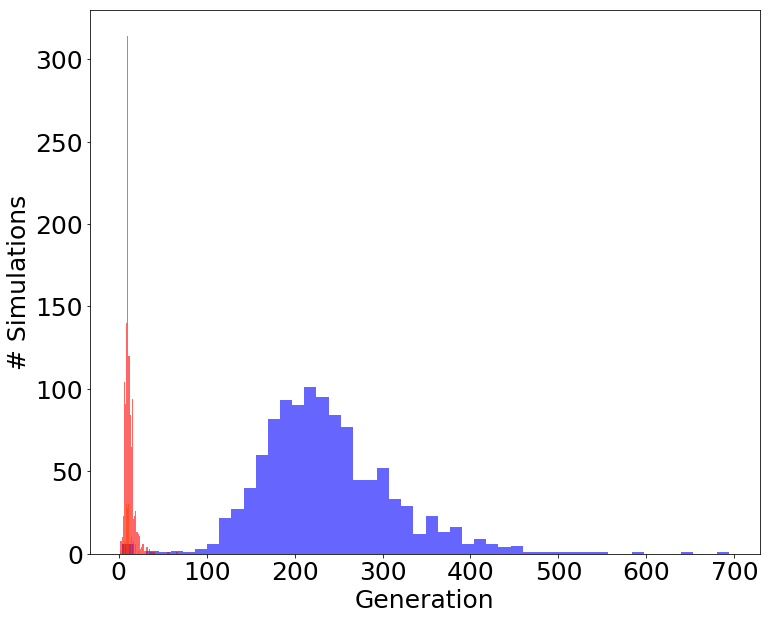

In [61]:
def generation(model):
    return dfs[model]["generation"]

plot_model_stat(generation, "Generation")

In [97]:
f = "/home/isaac/Continuosity/MESS/MESS/tmp/default_MESS/SIMOUT.txt"
d = pd.read_csv(f, sep="\t", header=0)
d[:10]

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,500,245425,2.0,0.7,2.0,0.001,0.25,neutral,point_mutation,0.0,2000,570.0,500.0,0.01,0.00044,10.0,0.262,0.01560,0.00600,0.58824,2.48769,19.0,3.13442,1.80936,1.58575,1.50796,2.79081,2.65574,2.57143,2.51767,0.00011,0.00027,2.30113,3.63596,0.0,0.00000,0.00068,0.00107,1.75511,1.90502,0.00018,0.00079,0.0,10.96384,6.66578,5.48406,4.97297,2.73153,3.49639,-0.18871,-0.80019,3.02069,5.23787,-0.33894,4.66911,0.10982,-0.93349,-0.94286,7.75281,-3.07047,1.17272,0.29853,-0.13330,-3.96355,2.51494,0.42689,0.29673,-0.39400,0.36972,-0.00557,-0.07733,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,500,190848,2.0,0.7,2.0,0.001,0.25,neutral,point_mutation,0.0,2000,570.0,500.0,0.01,0.00038,29.0,0.250,0.01228,0.00690,0.58824,-3.36816,12.0,2.51528,1.64545,1.47779,1.41673,1.00000,1.00000,1.00000,1.00000,0.00003,0.00010,3.01511,7.09091,0.0,0.00000,0.00028,0.00049,1.80239,1.79602,0.00000,0.00022,0.0,5.12267,4.05808,3.81158,3.70676,-3.15336,3.23143,0.70007,-0.70962,-3.71399,3.96200,-1.31551,3.22760,0.51656,0.52243,-1.56072,4.07246,1.83785,-0.00383,-0.18351,1.23206,2.15327,0.11046,0.29409,0.21912,0.58597,0.34163,-0.13676,0.04367,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,500,227704,2.0,0.7,2.0,0.001,0.25,competition,point_mutation,0.0,2000,570.0,500.0,0.01,0.00016,3.0,0.290,0.00667,0.00000,0.58824,-1.29740,6.0,2.06471,1.91486,1.85501,1.81144,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-3.00000,0.0,0.00000,0.00064,0.00092,1.12175,-0.34017,0.00009,0.00096,0.0,2.42955,2.15501,2.12337,2.11280,1.22362,3.85693,-0.99625,-0.19289,2.17601,3.90671,-0.12053,3.53354,-0.25110,-0.95095,0.43238,5.70658,-1.34415,-0.32340,0.74515,-0.75806,-1.74363,1.79986,0.35921,0.00000,-0.43948,0.00000,0.69825,0.00000,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
3,500,338643,2.0,0.7,2.0,0.001,0.25,neutral,point_mutation,0.0,2000,570.0,500.0,0.01,0.00063,59.0,0.276,0.00922,0.00759,0.58824,2.82756,17.0,3.23918,1.82293,1.58929,1.51029,2.99030,2.98108,2.97236,2.96416,0.00016,0.00035,1.72616,1.02515,0.0,0.00000,0.00149,0.00200,0.95064,-0.79237,0.00035,0.00404,0.0,8.63855,6.36938,5.83013,5.60443,-0.98304,2.24421,-0.38010,0.01617,-1.50130,3.05327,-1.70420,2.72400,-0.14304,0.22621,-1.59957,3.57879,-0.72115,0.47979,0.23707,0.21004,-0.09827,0.52552,-0.03931,0.04752,0.25744,0.50983,-0.00130,-0.19373,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,500,68766,2.0,0.7,2.0,0.001,0.25,competition,point_mutation,0.0,2000,570.0,500.0,0.01,0.00087,30.0,0.262,0.00920,0.00693,0.58824,1.69105,15.0,3.07792,1.75114,1.53884,1.46749,1.98177,1.96413,1.94737,1.93168,0.00010,0.00025,2.24705,3.21430,0.0,0.00000,0.00014,0.00035,3.04747,8.07669,0.00000,0.00009,0.0,10.40204,7.48574,6.52425,5.98245,-2.24039,2.71915,-0.29997,1.46727,-2.20250,1.99611,-0.59714,3.14971,0.00442,-0.18373,-0.65216,4.21515,1.64325,0.43056,0.30440,-1.65099,1.55034,2.21904,0.18080,0.20730,0.03427,0.76038,0.09180,-0.49502,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,500,385756,2.0,0.7,2.0,0.001,0.25,competition,point_

28
34
38


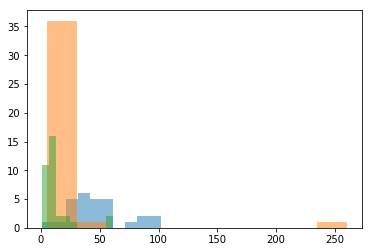

In [98]:
f = "/home/isaac/Continuosity/MESS/MESS/tmp/default_MESS/SIMOUT.txt"
d = pd.read_csv(f, sep="\t", header=0)
ndf = d[d["community_assembly_model"] == "neutral"]
print(len(ndf))
cdf = d[d["community_assembly_model"] == "competition"]
print(len(cdf))
fdf = d[d["community_assembly_model"] == "filtering"]
print(len(fdf))
fig, ax = plt.subplots()
ax.hist(ndf["generation"], alpha=0.5)
ax.hist(fdf["generation"], alpha=0.5)
_, _, _ = ax.hist(cdf["generation"], alpha=0.5)